# Module 3: Final technical exercise

### 🧹PHASE 1: Exploration and Cleaning🧹

In [154]:
import pandas as pd
import numpy as np
import random
import emoji

In [155]:
df_flights = pd.read_csv("Customer Flight Activity.csv")
df_loyalty = pd.read_csv("Customer Loyalty History.csv")

In [156]:
df_loyalty.tail()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


In [157]:
df_flights.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [ ]:
df_airline = df_loyalty.merge(df_flights, on="Loyalty Number", how="outer") 

In [159]:
df_airline.sample()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
13260,129533,Canada,Ontario,Trenton,K8V 4B2,Male,Bachelor,59926.0,Married,Star,2858.29,2018 Promotion,2018,3,NaN,NaN,2018,2,0,0,0,0,0.0,0,0


In [160]:
df_airline.shape

(405624, 25)

In [ ]:
df_airline.info()
#There are some types of data that need to be changed, such as in the Cancellation Year and Cancellation Month columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Country                      405624 non-null  object 
 2   Province                     405624 non-null  object 
 3   City                         405624 non-null  object 
 4   Postal Code                  405624 non-null  object 
 5   Gender                       405624 non-null  object 
 6   Education                    405624 non-null  object 
 7   Salary                       302952 non-null  float64
 8   Marital Status               405624 non-null  object 
 9   Loyalty Card                 405624 non-null  object 
 10  CLV                          405624 non-null  float64
 11  Enrollment Type              405624 non-null  object 
 12  Enrollment Year              405624 non-null  int64  
 13 

In [ ]:
# Checking randomly that there is no data written incorrectly or that it contains errors
df_airline['Education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [163]:
df_airline['Marital Status'].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

**Duplicates handling**

In [164]:
df_airline["Loyalty Number"].value_counts()

Loyalty Number
678205    72
467894    48
684881    48
208241    48
126490    48
          ..
403361    24
403463    24
403473    24
403500    24
999986    24
Name: count, Length: 16737, dtype: int64

In [165]:
df_airline[df_airline['Loyalty Number'] == 678205]

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
260688,678205,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
260689,678205,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
260690,678205,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
260691,678205,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,NaN,NaN,2017,2,0,0,0,0,0.0,0,0
260692,678205,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,NaN,NaN,2017,2,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260755,678205,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,NaN,NaN,2018,11,11,0,11,1177,117.0,0,0
260756,678205,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,NaN,NaN,2018,11,8,1,9,1341,134.0,0,0
260757,678205,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,NaN,NaN,2018,12,0,0,0,0,0.0,0,0
260758,678205,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,NaN,NaN,2018,12,0,0,0,0,0.0,0,0


In [ ]:
df_airline = df_airline.drop_duplicates() #Removing duplicates

In [167]:
df_airline.duplicated().sum()

0

**Vamos a tratar los nulos**

In [ ]:
#Analysis of which columns contain missing data

df_airline.isnull().sum()

Loyalty Number                      0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102260
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              354110
Cancellation Month             354110
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
dtype: int64

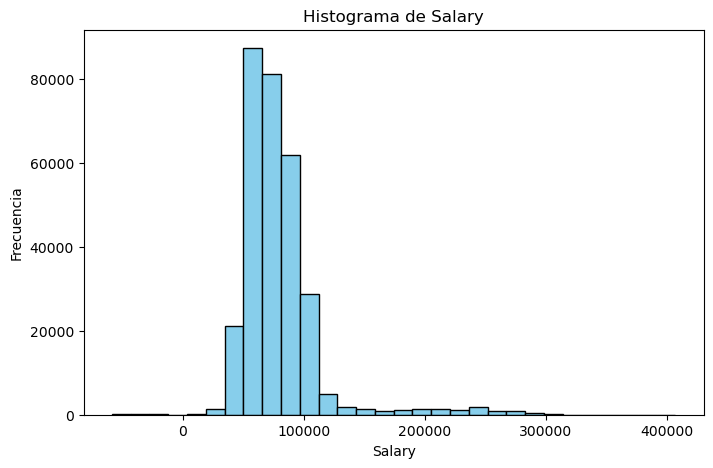

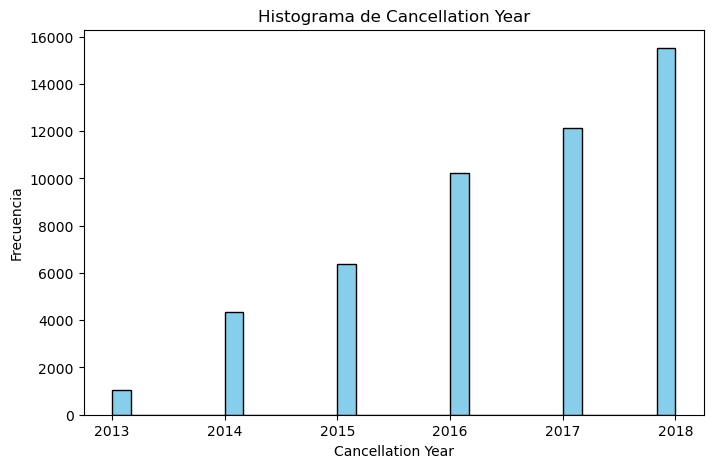

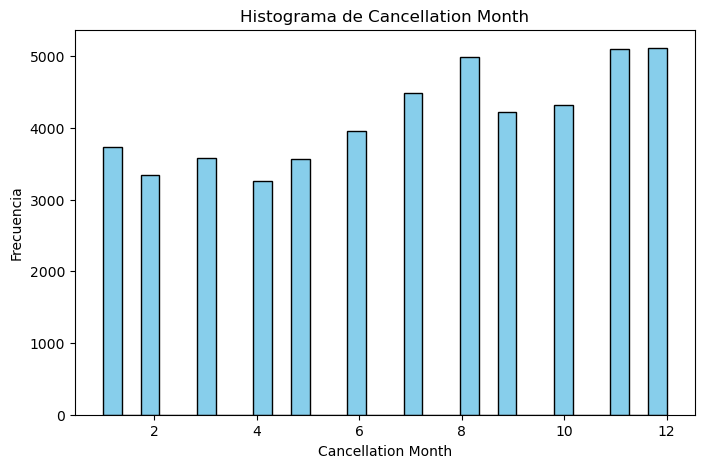

In [ ]:
import matplotlib.pyplot as plt
#I want to see the distribution of the nulls, to see if they have a normal distribution:
null_numeric_columns = df_airline[df_airline.columns[df_airline.isnull().any()]].select_dtypes(include = "number").columns

for col in list(null_numeric_columns): # if it detects a null, it makes a histogram
    plt.figure(figsize=(8, 5))
    plt.hist(df_airline[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

In [209]:
#Let's see the % of null values ​​in the columns
for col in null_numeric_columns:
    print(f"The distribution of categories (including null values ​​🏴󠁴󠁨󠀵󠀵󠁿) for the column", col)
    display(df_airline[col].value_counts(dropna=False, normalize=True) * 100) 
    print("........................")

The distribution of categories (including null values ​​🏴󠁴󠁨󠀵󠀵󠁿) for the column Salary


Salary
 79258.576285     25.326927
 101933.000000     0.136715
 62283.000000      0.083218
 51573.000000      0.083218
 61809.000000      0.083218
                    ...    
-31911.000000      0.005944
 64630.000000      0.005944
 77950.000000      0.005944
 85525.000000      0.005944
 46594.000000      0.005944
Name: proportion, Length: 5891, dtype: float64

........................
The distribution of categories (including null values ​​🏴󠁴󠁨󠀵󠀵󠁿) for the column Cancellation Year


Cancellation Year
Current    87.703091
2018.0      3.843620
2017.0      3.008470
2016.0      2.538141
2015.0      1.575193
2014.0      1.075887
2013.0      0.255597
Name: proportion, dtype: float64

........................
The distribution of categories (including null values ​​🏴󠁴󠁨󠀵󠀵󠁿) for the column Cancellation Month


Cancellation Month
Ongoing    87.703091
12.0        1.266099
11.0        1.261888
8.0         1.236378
7.0         1.109570
10.0        1.070438
9.0         1.046166
6.0         0.980781
1.0         0.923073
3.0         0.886418
5.0         0.881464
2.0         0.826233
4.0         0.808401
Name: proportion, dtype: float64

........................


    ✍🏼Conclusion: In the 3 columns we have a high percentage of nulls (more than 15% in each column)

We have asked the airline about the importance of these 3 columns and they tell us that:

💰 **Salary:** This is an essential piece of information, we will need to use more advanced techniques to deal with nulls.

📅 **Year and month of cancellation:** These customers are still active, we will complete with "Current" and "Ongoing"

In [171]:
df_airline['Cancellation Month'] = df_airline['Cancellation Month'].fillna('Ongoing')

In [172]:
df_airline['Cancellation Year'] = df_airline['Cancellation Year'].fillna('Current')

In [210]:
#I want to see where we have more nulls

salary_education = df_airline.groupby("Education")["Salary"].mean().reset_index()
salary_education.rename(columns={"Salary": "Average Salary"}, inplace=True)
print(salary_education)

              Education  Average Salary
0              Bachelor    72473.471154
1               College    79258.576285
2                Doctor   178403.675202
3  High School or Below    61019.926143
4                Master   103734.523724


C:\Users\crist\AppData\Local\Temp\ipykernel_17212\103677170.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_education = df_airline.groupby("Education")["Salary"].mean().reset_index()


In [174]:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer 
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [ ]:
# Using imputer techniques to try to obtain the data we are missing because we are going to need this column

imputer_iter = IterativeImputer(max_iter = 100, random_state = 42)
df_airline['Salary'] = imputer_iter.fit_transform(df_airline[['Salary']])

In [176]:
df_airline.isnull().sum()

Loyalty Number                 0
Country                        0
Province                       0
City                           0
Postal Code                    0
Gender                         0
Education                      0
Salary                         0
Marital Status                 0
Loyalty Card                   0
CLV                            0
Enrollment Type                0
Enrollment Year                0
Enrollment Month               0
Cancellation Year              0
Cancellation Month             0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [ ]:
# Changed the data type now that we have no nulls or duplicates

df_airline['Enrollment Year']=df_airline['Enrollment Year'].astype(int)
df_airline['Enrollment Month']=df_airline['Enrollment Month'].astype(int)

In [ ]:
# Changing the following columns to category type: gender, marital status, and education

categorical_cols = ["Gender", "Marital Status", "Education"]
df_airline[categorical_cols] = df_airline[categorical_cols].astype("category")

In [179]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403760 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   Loyalty Number               403760 non-null  int64   
 1   Country                      403760 non-null  object  
 2   Province                     403760 non-null  object  
 3   City                         403760 non-null  object  
 4   Postal Code                  403760 non-null  object  
 5   Gender                       403760 non-null  category
 6   Education                    403760 non-null  category
 7   Salary                       403760 non-null  float64 
 8   Marital Status               403760 non-null  category
 9   Loyalty Card                 403760 non-null  object  
 10  CLV                          403760 non-null  float64 
 11  Enrollment Type              403760 non-null  object  
 12  Enrollment Year              403760 non-null  int

In [ ]:
# We already have the duplicates and nulls cleaned 🧼 and also the data type according to our interests 🎉

In [181]:
df_airline.to_csv("df_airline.csv", index=False)

### 📊 PHASE 2: Visualization📊

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) # to be able to display all the columns of the DataFrames

**1. How is the number of flights booked per month distributed during each year?**

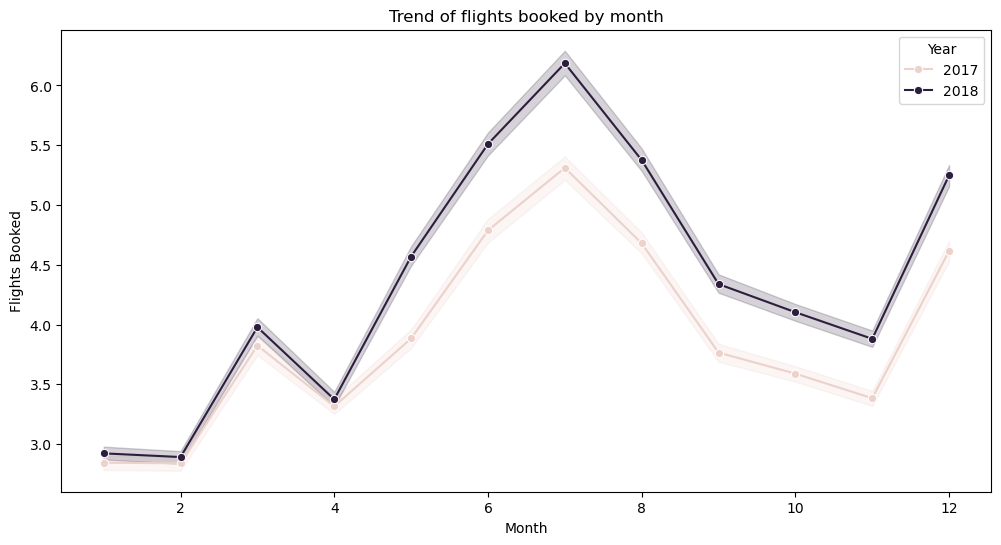

In [212]:
# For the analysis of numerical Bivariate analysis, it would be best to use a heatmap, line or scatter plot diagram.

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_airline, x="Month", y="Flights Booked", hue="Year", marker="o")
plt.title("Trend of flights booked by month")
plt.xlabel("Month")
plt.ylabel("Flights Booked")
plt.legend(title="Year")
plt.show()


✍🏼 They have a very similar distribution during the first quarter of the year and an increase in activity is observed in both years during the second and third quarter, spring-summer months. During the last quarter of the year, both experience a progressive drop in activity, followed by an exponential peak towards the end of the year, most likely caused by the Christmas holidays. It is worth noting that greater activity is observed in 2018 compared to 2017.

**2. Is there a relationship between flight distance and points accumulated by customers?**

Text(0.5, 1.0, 'Relationship between flight distance and points accumulated per customer')

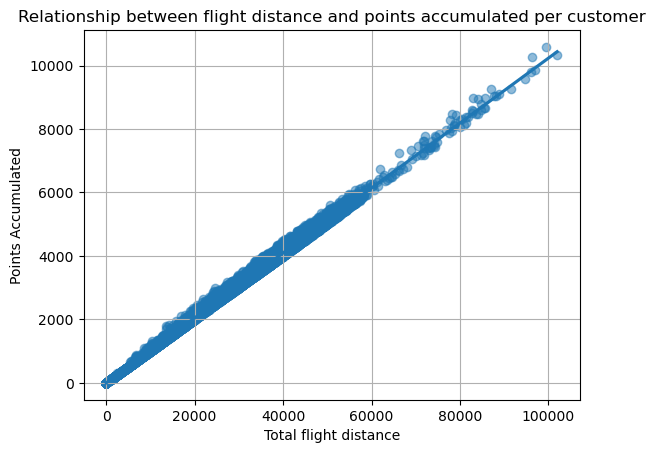

In [213]:
customer_data = df_airline.groupby("Loyalty Number")[["Distance", "Points Accumulated"]].sum().reset_index()

sns.regplot(x="Distance", y="Points Accumulated", data=customer_data, scatter_kws={"alpha":0.5})
plt.xlabel("Total flight distance")
plt.ylabel("Points Accumulated")
plt.grid(True)
plt.title("Relationship between flight distance and points accumulated per customer")


Text(0.5, 1.0, 'Relación entre distancia de vuelos y puntos acumulados por cliente')

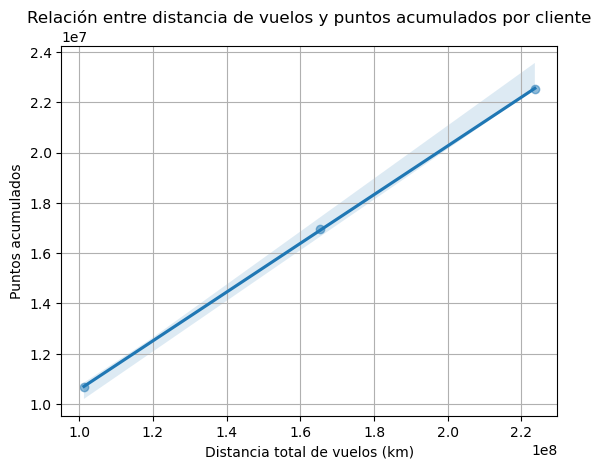

In [ ]:
#de esta forma nose si son valores unicos :(
customer_distance_data = df_airline.groupby("Loyalty Card")[["Distance", "Points Accumulated"]].sum().reset_index()

sns.regplot(x="Distance", y="Points Accumulated", data=customer_distance_data, scatter_kws={"alpha":0.5})
plt.xlabel("Total flight distances")
plt.ylabel("Points Accumulateds")
plt.grid(True)
plt.title("Relationship between flight distance and points accumulated per customer")

✍🏼 There is a clear relationship between the distance traveled on flights and the number of points accumulated.
This relationship seems to be positive, since when one of the two variables increases, the other does as well.

**3. What is the distribution of customers by province or state? We want to see how many customers there are in each
province.**

In [187]:
province_unique = df_airline.groupby('Province')['Loyalty Number'].nunique().sort_values(ascending=False).reset_index()
province_unique

,Province,Loyalty Number
0,Ontario,5404
1,British Columbia,4409
2,Quebec,3300
3,Alberta,969
4,Manitoba,658
5,New Brunswick,636
6,Nova Scotia,518
7,Saskatchewan,409
8,Newfoundland,258
9,Yukon,110


C:\Users\crist\AppData\Local\Temp\ipykernel_17212\2966259740.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Province", y= "Loyalty Number", data=province_unique, legend=False, palette='Pastel2')


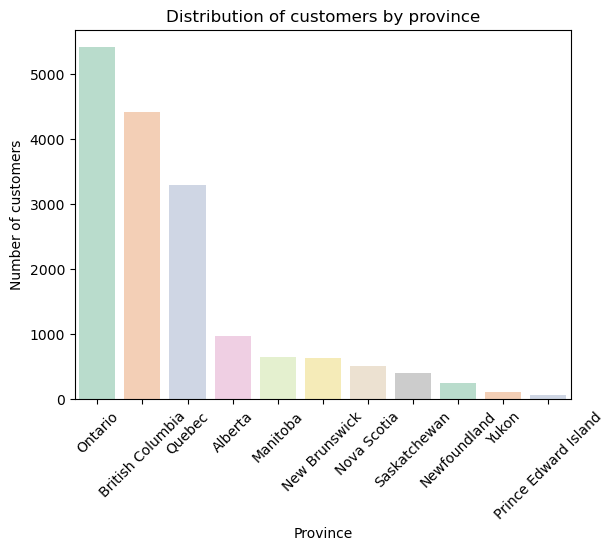

In [188]:
sns.barplot(x="Province", y= "Loyalty Number", data=province_unique, legend=False, palette='Pastel2')

plt.title('Distribution of customers by province')
plt.xlabel('Province')
plt.ylabel('Number of customers')
plt.xticks(rotation=45)
plt.show()

✍🏼 There is no even representation of the provinces, but it is observed that the vast majority of customers are from Ontario,
followed by British Columbia. In contrast, Yukon and Prince Edward Island have the lowest representation.

**4. Compara el salario promedio por nivel educativo**

C:\Users\crist\AppData\Local\Temp\ipykernel_17212\2422298479.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  education_salary = df_airline.groupby("Education")["Salary"].mean().reset_index()
C:\Users\crist\AppData\Local\Temp\ipykernel_17212\2422298479.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Education", x="Salary", data=education_salary, palette="plasma")


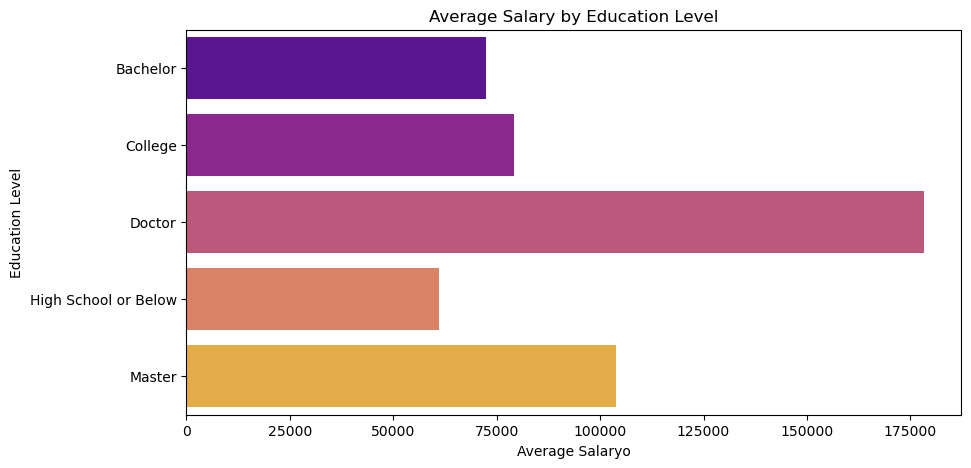

In [ ]:
df_airline["Education"].unique()

# Grouping by educational level and average salary
education_salary = df_airline.groupby("Education")["Salary"].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(y="Education", x="Salary", data=education_salary, palette="plasma")
plt.xlabel("Average Salary")
plt.ylabel("Education Level")
plt.title("Average Salary by Education Level")

plt.show()

✍🏼 This information should be interpreted taking into account that 25.32% of the data within Salary were nulls and were filled with advanced imputation techniques.
With this in mind, we can see a positive correlation between the educational level and the average salary,
since, as the educational level increases, salaries tend to increase 📈

It should also be noted that there is a large jump in average salaries from Master level to Doctor level.

**5. What is the percentage of customers for each type of loyalty card?**

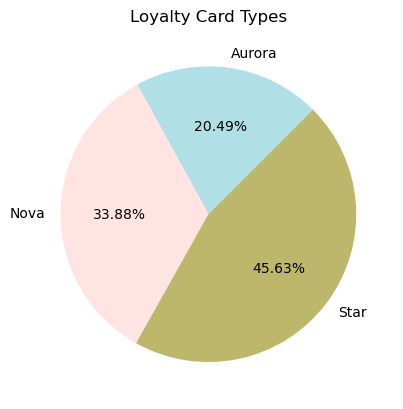

In [ ]:
card_distribution = df_airline.groupby('Loyalty Card')['Loyalty Number'].nunique()

plt.pie(x=card_distribution.values, 
        labels=card_distribution.index,  
        autopct='%1.2f%%', # each segment with two decimals
        startangle=45,
        colors=['#B0E0E6', '#FFE4E1', '#BDB76B']) 
plt.title("Loyalty Card Types", fontsize=12)
plt.show()

✍🏼 Most customers move between the **Star** ⭐ and **Nova**🩷 loyalty cards (45.63% and 33.88% respectively), with **Aurora**🩵 being the least represented (20.6%).

**6. How are clients distributed according to their marital status and gender? Show a graph where I can see my clients
separated by marital status category and in each category I can see which ones are men and which ones are women**

C:\Users\crist\AppData\Local\Temp\ipykernel_17212\3599075430.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  marital_gender_distribution = df_airline.groupby(['Marital Status', 'Gender'])['Loyalty Number'].nunique().reset_index()


Text(0.5, 0, 'Marital status')

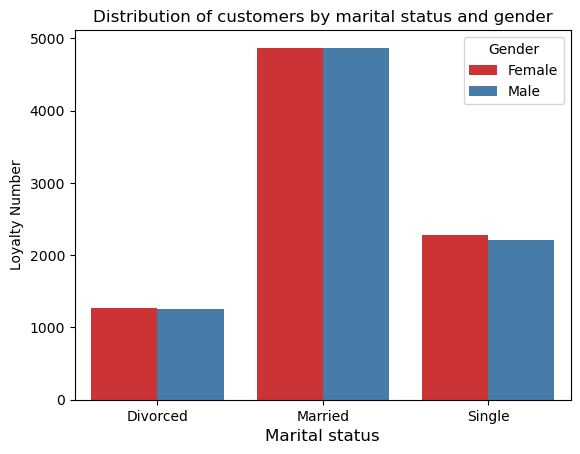

In [192]:
marital_gender_distribution = df_airline.groupby(['Marital Status', 'Gender'])['Loyalty Number'].nunique().reset_index()

sns.barplot(x='Marital Status', y="Loyalty Number", hue='Gender', data=marital_gender_distribution, palette='Set1')
plt.title('Distribution of customers by marital status and gender', fontsize=12)
plt.xlabel('Marital status', fontsize=12)

✍🏼 There is no clear difference between the two genders when it comes to marital status. What is observed is that the majority of clients, both men and women, are married.

### 🔥 **BONUS** Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo 🔥


**Se busca evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los**
**clientes. Para ello, los pasos que deberás seguir son:**
   1.  **Preparación de Datos:** Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights
Booked'** y 'Education'.
   2.  **Análisis Descriptivo:** Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el
promedio, la desviación estándar) del número de vuelos reservados para cada grupo.
   3.  **Prueba Estadística:** Realiza una prueba de hipótesis para determinar si existe una diferencia significativa en el
número de vuelos reservados entre los diferentes niveles educativos. Como son varios grupos, puedes ir
comparándolos de dos en dos.

**Preparacion de datos**

In [194]:
#First we filter the dataset to include only the relevant columns 'Flights Booked' and 'Education':

filtered_dataset = df_airline[['Education', 'Flights Booked']]
filtered_dataset.sample(10)

,Education,Flights Booked
29440,Bachelor,8
262843,Bachelor,10
54712,Bachelor,8
362429,Bachelor,0
303737,Bachelor,0
108310,Bachelor,5
187803,Bachelor,0
288394,Bachelor,7
63104,Bachelor,7
354921,Bachelor,1


**Analisis Descriptivo**

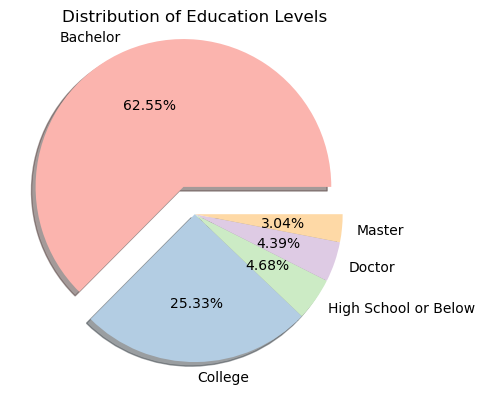

In [195]:
#Antes quiero ver como está la distribución entre los niveles educativos, para tener en cuenta el tamaño de la muestra
education_stats = filtered_dataset['Education'].value_counts()

y = education_stats
mylabels = ['Education']
myexplode = [0.2, 0, 0, 0, 0]
colors = plt.cm.cubehelix(range(len(education_stats)))

plt.pie(education_stats, labels=education_stats.index,autopct='%1.2f%%', explode = myexplode, shadow = True, colors=plt.cm.Pastel1.colors) 
plt.title("Distribution of Education Levels", fontsize=12)
plt.show()

In [196]:
#We group the data according to the educational level and calculate basic descriptive statistics

In [197]:
stats_by_education = filtered_dataset.groupby ('Education')['Flights Booked'].agg(['mean', 'median', 'std'])
stats_by_education

C:\Users\crist\AppData\Local\Temp\ipykernel_17212\4211958192.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_by_education = filtered_dataset.groupby ('Education')['Flights Booked'].agg(['mean', 'median', 'std'])


,mean,median,std
Education,,,
Bachelor,4.110288,1.0,5.221671
College,4.169744,1.0,5.246040
Doctor,4.175512,1.0,5.256971
High School or Below,4.176209,1.0,5.239267
Master,4.200700,1.0,5.213956


In [198]:
filtered_dataset.groupby ('Education')['Flights Booked'].describe().T 

C:\Users\crist\AppData\Local\Temp\ipykernel_17212\2922316451.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_dataset.groupby ('Education')['Flights Booked'].describe().T


Education,Bachelor,College,Doctor,High School or Below,Master
count,252567.000000,102260.000000,17731.000000,18915.000000,12287.000000
mean,4.110288,4.169744,4.175512,4.176209,4.200700
std,5.221671,5.246040,5.256971,5.239267,5.213956
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000
75%,8.000000,8.000000,8.000000,8.000000,8.000000
max,21.000000,21.000000,21.000000,21.000000,21.000000


    Insights from the Descriptive Analysis:

✈️ Los diferentes niveles educativos tienen una cantidad similar de vuelos reservados, con una media cercana a 4 y una mediana de 1, wich means, that some people book very few flights, while others book a lot.

🎓La desviación estándar es casi idéntica en todos los grupos (~5.2), lo que indica que la variabilidad en las reservas es similar independientemente del nivel educativo.

📉 Los percentiles muestran que la mayoría de los clientes reservan entre 1 y 8 vuelos y el hecho de que el máximo de reservas sea exactamente 21 en todos los niveles educativos podría llevar a pensar en un posible límite o un sesgo en la recopilación de datos, por lo que estaría bien revisar el método de obtención de datos por si acaso.

🔍 Para futuros análisis, sería interesante segmentar a los viajeros frecuentes y analizar cómo impactan en los resultados generales de la empresa.

**Prueba de Estadistica**

In [199]:
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

In [200]:
#Defino los grupos
Grupo1 = filtered_dataset[filtered_dataset["Education"] == "High School or Below"]["Flights Booked"].values
Grupo2 = filtered_dataset[filtered_dataset["Education"] == "College"]["Flights Booked"].values
Grupo3 = filtered_dataset[filtered_dataset["Education"] == "Bachelor"]["Flights Booked"].values
Grupo4 = filtered_dataset[filtered_dataset["Education"] == "Master"]["Flights Booked"].values
Grupo5 = filtered_dataset[filtered_dataset["Education"] == "Doctor"]["Flights Booked"].values

In [201]:
def prueba_hipotesis(*args):
    """
    Realiza una prueba de hipótesis para comparar grupos.
    1. Primero verifica si los datos son normales usando el test de Shapiro-Wilk o Kolmogorov-Smirnov.
    2. Si los datos son normales, usa Bartlett para probar igualdad de varianzas. Si no son normales, usa Levene.
    3. Si las varianzas son iguales, usa el t-test de Student; si no, usa la versión de Welch.
    4. Si los datos no son normales, usa el test de Mann-Whitney

    Parámetros:
    *args: listas o arrays con los datos de cada grupo. Espera DOS grupos a comparar

    Retorna:
    dict con resultados del test de normalidad, varianza e hipótesis.
    """
    
    # Verificar si hay al menos dos grupos
    if len(args) < 2:
        raise ValueError("Se necesitan al menos dos conjuntos de datos para realizar la prueba.")
    
    # Comprobar normalidad en cada grupo
    normalidad = []
    for grupo in args:
        if len(grupo) > 50:
            p_valor_norm = stats.kstest(grupo, 'norm').pvalue  # Kolmogorov-Smirnov si n > 50
        else:
            p_valor_norm = stats.shapiro(grupo).pvalue  # Shapiro-Wilk si n <= 50
        normalidad.append(p_valor_norm > 0.05)

    datos_normales = all(normalidad)  # True si todos los grupos son normales

    # Prueba de igualdad de varianzas
    if datos_normales:
        p_valor_varianza = stats.bartlett(*args).pvalue  # Test de Bartlett si los datos son normales
    else:
        p_valor_varianza = stats.levene(*args, center="median").pvalue  # Test de Levene si no son normales

    varianzas_iguales = p_valor_varianza > 0.05

    # Aplicar el test adecuado
    if datos_normales:
        if varianzas_iguales:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=True)
            test_usado = "t-test de Student (varianzas iguales)"
        else:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=False)
            test_usado = "t-test de Welch (varianzas desiguales)"
    else:
        t_stat, p_valor = stats.mannwhitneyu(*args)
        test_usado = "Mann-Whitney U"

    # Nivel de significancia
    alfa = 0.05

    # Resultados
    resultado = {
        "Test de Normalidad": normalidad,
        "Datos Normales": datos_normales,
        "p-valor Varianza": p_valor_varianza,
        "Varianzas Iguales": varianzas_iguales,
        "Test Usado": test_usado,
        "Estadístico": t_stat,
        "p-valor": p_valor,
        "Conclusión": "Rechazamos H0. Es decir, sí hay diferencias significativas)" if p_valor < alfa else "No se rechaza H0. Es decir, no hay diferencias significativas)"
    }

    # Imprimir resultados de manera más clara
    print("\n📊 **Resultados de la Prueba de Hipótesis** 📊")
    print(f"✅ Test de Normalidad: {'Sí' if datos_normales else 'No'}")
    print(f"   - Normalidad por grupo: {normalidad}")
    print(f"✅ Test de Varianza: {'Iguales' if varianzas_iguales else 'Desiguales'} (p = {p_valor_varianza:.4f})")
    print(f"✅ Test aplicado: {test_usado}")
    print(f"📉 Estadístico: {t_stat:.4f}, p-valor: {p_valor:.4f}")
    print(f"🔍 Conclusión: {resultado['Conclusión']}\n")

In [202]:
#Vamos a ir comparando cada par de grupos

In [203]:
prueba_hipotesis(Grupo1, Grupo2)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [False, False]
✅ Test de Varianza: Iguales (p = 0.9502)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 969453228.5000, p-valor: 0.5757
🔍 Conclusión: No se rechaza H0. Es decir, no hay diferencias significativas)



In [204]:
prueba_hipotesis(Grupo2, Grupo3)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [False, False]
✅ Test de Varianza: Desiguales (p = 0.0027)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 12993040557.5000, p-valor: 0.0023
🔍 Conclusión: Rechazamos H0. Es decir, sí hay diferencias significativas)



In [205]:
prueba_hipotesis(Grupo3, Grupo4)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [False, False]
✅ Test de Varianza: Iguales (p = 0.1183)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 1532540228.0000, p-valor: 0.0141
🔍 Conclusión: Rechazamos H0. Es decir, sí hay diferencias significativas)



In [206]:
prueba_hipotesis(Grupo4, Grupo5)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [False, False]
✅ Test de Varianza: Iguales (p = 0.8104)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 109499288.0000, p-valor: 0.4139
🔍 Conclusión: No se rechaza H0. Es decir, no hay diferencias significativas)



👩🏼‍🏫 **Conclusiones finales**

Hemos establecido unos grupos de datos teniendo en cuenta el orden del nivel educativo de menor a mayor

1️⃣ High School or Below - **Group 1**

2️⃣ College - **Group 2**

3️⃣ Bachelor - **Group 3**

4️⃣ Master - **Group 4**

5️⃣ Doctor - **Group 5**

Hemos realizado comparaciones por pares de datos entre los cinco grupos de cada nivel educativo en relación con la cantidad de vuelos reservados.
En líneas generales, no se aprecian diferencias estadísticamente significativas en ningún par de grupos, a excepción del Grupo 3 (Bachelor)
Por lo que, si hablamos de relacionar habitos de compra/ reserva de vuelos con nivel educativo no existen grandes distinciones entre los distintos grupos.

Como conslusión general, el nivel educativo, no parece ser un factor definitorio del comportamiento de reserva de vuelos. Quizá en futuros análisis se podría poner el foco en la relación con una categoría diferente como genero, marital status u otros factores que nos pueden dar directrices a la hora de dirigirnos a un grupo específico de mercado a la hora de hacer campañas de marketing, promociones u ofertas.